## panels for fig 1 

#### Figure Purpose: Give readers enough information about the dataset as a glance to decide if it is of interest to them. 

* electrode localizations
* unit distribution across patients, stratified by region
* overall unit information
* general stimulus information

In [3]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', )))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', '..')))

from collections import Counter, OrderedDict
from pathlib import Path

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
from nilearn.plotting import plot_markers

from config_colors import *
from config_paths import *
from config_plot_params import *
from nwb_io import *
from plot_patientwise_unit_distribution import *

# save panels directly to the relevant svg/ subdir
panel_save_dir = Path.cwd().parent.parent / "figure_generation" / "figure_data_overview" / "svg"

data_dir = NWB_data_dir

In [2]:
## collect all units from all nwb files

i = 0 

for path in tqdm(list(data_dir.glob("*.nwb"))):
    print(path)
    if path.is_dir():
        continue 

    patient_id = int(path.name.split(".")[0][3:])
    print(f"  {patient_id}")
    io = NWBHDF5IO(path, mode="r")
    nwbfile = io.read()

    df_units = nwbfile.units.to_dataframe()
    df_units["unit_id"] = np.arange(0, len(df_units))

    df_units.insert(0, "patient_id", [patient_id] * len(df_units), )
    
    if i == 0:
        df_units_all = df_units.copy()
    else:
        df_units_all = pd.concat([df_units_all, df_units], ignore_index=True)
    
    io.close()
    i += 1

  0%|          | 0/29 [00:00<?, ?it/s]

/media/al/Seagate/movies_dataset_nwb/sub14.nwb
  14


  0%|          | 0/29 [00:19<?, ?it/s]


KeyboardInterrupt: 

## raster plot

In [ ]:
pat = 42

# spikes = df_units_all[df_units_all["patient_id"] == pat]["spike_times"]
# spikes = np.array(spikes)

  0%|          | 0/1 [00:00<?, ?it/s]

/media/al/Seagate/movies_dataset_nwb/sub42.nwb
  42


100%|██████████| 1/1 [06:39<00:00, 399.72s/it]


In [31]:
minutes = 10
time_limit = minutes * 60 * 1000 

data = []
for unit in spikes:
    unit_ = []
    for s in unit:
        #if s >= onset and s <= offset:
        if s <= time_limit:
            unit_.append(s)
            
    data.append(np.array(unit_))

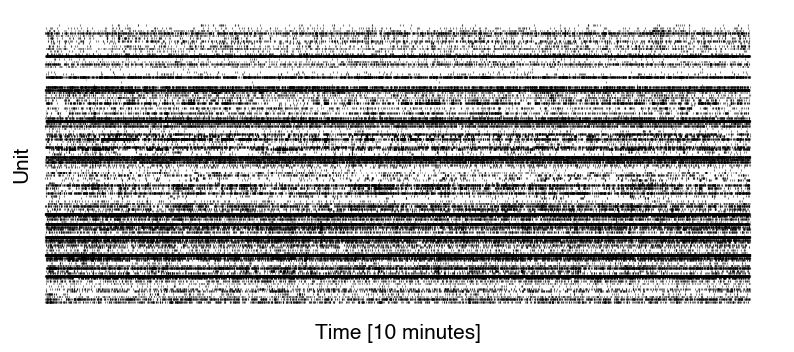

In [66]:
fig, ax = plt.subplots(1, 1, figsize=(10,4))

ax.eventplot(data, linewidths=0.8, linelengths=.7, color='black', alpha=0.5)
ax.invert_yaxis()
ax.set_yticks([])
ax.set_yticklabels([])
ax.yaxis.set_ticks_position('none') 

ax.set_xticks([])
ax.set_xticklabels([])
ax.set_xlabel("Time [10 minutes]", fontsize=labelsize, fontproperties=font)
ax.set_ylabel("Unit", fontsize=labelsize, labelpad=-15, fontproperties=font)

sns.despine(left=True, bottom=True)
#plt.tight_layout()

plt.savefig(panel_save_dir / "raster.png", bbox_inches="tight", dpi=300)

plt.show()

## electrode localizations

In [26]:
i = 0 

for path in tqdm(list(data_dir.glob("*.nwb"))):
    print(path)
    if path.is_dir():
        continue 

    patient_id = int(path.name.split(".")[0][3:])
    print(f"  {patient_id}")
    io = NWBHDF5IO(path, mode="r")
    nwbfile = io.read()

    df_electrodes = nwbfile.electrodes.to_dataframe()
    df_electrodes.insert(0, "patient_id", [patient_id] * len(df_electrodes))
    
    if i == 0:
        df_electrodes_all = df_electrodes.copy()
    else:
        df_electrodes_all = pd.concat([df_electrodes_all, df_electrodes], ignore_index=True)
    
    io.close()
    i += 1

  0%|          | 0/29 [00:00<?, ?it/s]

/media/al/Seagate/movies_dataset_nwb/sub14.nwb
  14


  3%|▎         | 1/29 [00:00<00:15,  1.83it/s]

/media/al/Seagate/movies_dataset_nwb/sub52.nwb
  52


  7%|▋         | 2/29 [00:01<00:15,  1.77it/s]

/media/al/Seagate/movies_dataset_nwb/sub53.nwb
  53


 10%|█         | 3/29 [00:01<00:15,  1.63it/s]

/media/al/Seagate/movies_dataset_nwb/sub60.nwb
  60


 14%|█▍        | 4/29 [00:02<00:15,  1.66it/s]

/media/al/Seagate/movies_dataset_nwb/sub61.nwb
  61


 17%|█▋        | 5/29 [00:02<00:14,  1.71it/s]

/media/al/Seagate/movies_dataset_nwb/sub64.nwb
  64


 21%|██        | 6/29 [00:03<00:13,  1.72it/s]

/media/al/Seagate/movies_dataset_nwb/sub65.nwb
  65


 24%|██▍       | 7/29 [00:03<00:12,  1.83it/s]

/media/al/Seagate/movies_dataset_nwb/sub66.nwb
  66


 28%|██▊       | 8/29 [00:04<00:11,  1.80it/s]

/media/al/Seagate/movies_dataset_nwb/sub68.nwb
  68


 31%|███       | 9/29 [00:05<00:11,  1.73it/s]

/media/al/Seagate/movies_dataset_nwb/sub88.nwb
  88


 34%|███▍      | 10/29 [00:05<00:11,  1.67it/s]

/media/al/Seagate/movies_dataset_nwb/sub89.nwb
  89


 38%|███▊      | 11/29 [00:06<00:11,  1.57it/s]

/media/al/Seagate/movies_dataset_nwb/sub90.nwb
  90


 41%|████▏     | 12/29 [00:07<00:10,  1.55it/s]

/media/al/Seagate/movies_dataset_nwb/sub92.nwb
  92


 45%|████▍     | 13/29 [00:07<00:10,  1.59it/s]

/media/al/Seagate/movies_dataset_nwb/sub20.nwb
  20


 48%|████▊     | 14/29 [00:08<00:09,  1.64it/s]

/media/al/Seagate/movies_dataset_nwb/sub23.nwb
  23


 52%|█████▏    | 15/29 [00:09<00:08,  1.63it/s]

/media/al/Seagate/movies_dataset_nwb/sub28.nwb
  28


 55%|█████▌    | 16/29 [00:09<00:07,  1.63it/s]

/media/al/Seagate/movies_dataset_nwb/sub30.nwb
  30


 55%|█████▌    | 16/29 [00:10<00:08,  1.58it/s]


KeyboardInterrupt: 

In [52]:
node_coords = []
for i, row in df_electrodes_all.iterrows():
    node_coords.append(np.array([row.x, row.y, row.z]))

region_map = {
    "PIC": 1,
    "A": 2,
    "AH": 3,
    "MH": 3,
    "PH": 3, 
    "EC": 4,
    "PHC": 5,
    "APH": 5, 
    "MPH": 5, 
    "PPH": 5,
    "FF": 6,
    "LG": 7,
    "PRC": 8
}

node_values = [region_map[r]+(np.random.random()) for r in df_electrodes_all['brain_region']]


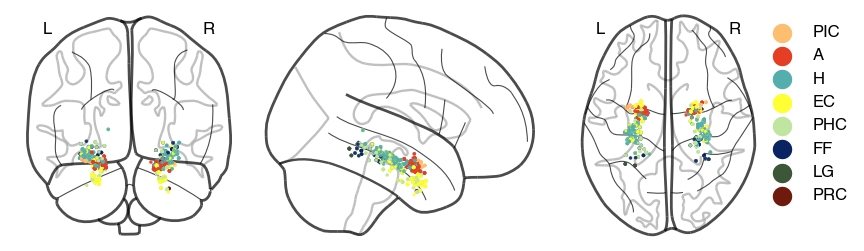

In [76]:
from matplotlib.colors import ListedColormap

colors = [
    '#fdbf6f',
    '#E53E24', 
    '#54aead', 
    '#FFFF33', 
    '#bfe5a0', 
    '#0A2463',
    '#3B5738',
    '#6E1A0D',

]

#cmap=sns.color_palette("Spectral", as_cmap=True)
cmap= ListedColormap(colors, name='brain_v2')
#plt.style.use('dark_background')
fig, ax = plt.subplots(1,1, figsize=(10,3))

node_size = 2.5
alpha = 0.8

plot_markers(
    node_values,    
    node_coords,     
    node_size=node_size,
    node_cmap=cmap,
    alpha=alpha,
    figure=fig,
    axes=ax,
    colorbar=False,
    black_bg=False,
)

norm = plt.Normalize(vmin=min(node_values), vmax=max(node_values))

handles = []
for region, value in region_map.items():
    if region in ["AH"]:
        region = "H"
        value = region_map["AH"]
    elif region in ["MH", "PH"]:
        continue

    if region in ["PHC"]:
        region = "PHC"
        value = region_map["PHC"]
    elif region in ["APH", "MPH", "PPH"]:
        continue

    color = cmap(norm(value))
    handle = plt.scatter([], [], color=color, s=100, label=region, edgecolor='w')    
    handles.append(handle)

ax.legend(handles=handles, title="", markerscale=1.5, bbox_to_anchor=(1.1, 1), fontsize=12, frameon=False)

plt.savefig(panel_save_dir / "localizations.png", bbox_inches="tight", dpi=300)
plt.savefig(panel_save_dir / "localizations.svg", bbox_inches="tight", dpi=300)
plt.show()

## units across regions

In [10]:
raw_regions = df_units_all["brain_region"]

raw_regions = [r for r in raw_regions if r not in ["H", "T", "Ta", "Tb", "I"]]
units_regions = pd.Series(raw_regions).replace("AH","H").replace("MH", "H").replace("PH", "H").replace("APH","PHC").replace("MPH","PHC").replace("PPH","PHC")
data = Counter(units_regions)

order_list = ["PIC", "A", "H", "EC", "PHC", "FF", "LG", "PRC"]
ordered_data = OrderedDict((k, data[k]) for k in order_list)

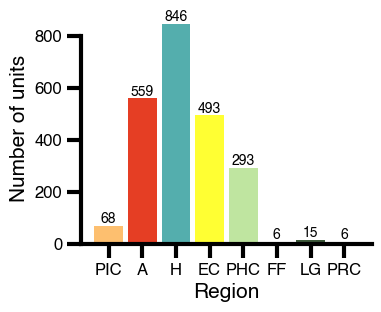

In [25]:
colors = [
    '#fdbf6f',
    '#E53E24', 
    '#54aead', 
    '#FFFF33', 
    '#bfe5a0', 
    '#0A2463',
    '#3B5738',
    '#6E1A0D',
]

bar_width = 0.85

fig, ax = plt.subplots(1,1, figsize=(3.75,3))
bars = ax.bar(ordered_data.keys(), ordered_data.values(), bar_width, color=colors, )


for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.5,  # Adjust vertical position
            f'{int(height)}', ha='center', va='bottom', fontsize=ticksize)

ax.set_xlabel(f"Region", fontsize=labelsize)
ax.set_ylabel("Number of units", fontsize=labelsize)

sns.despine()
ymin, ymax = ax.get_ylim()
ax.spines['left'].set_bounds(ymin, 800)

#plt.tight_layout()
plt.savefig(panel_save_dir / "units_by_region.png", bbox_inches="tight", dpi=300)
plt.savefig(panel_save_dir / "units_by_region.svg", bbox_inches="tight", dpi=300)
plt.show()


## units across patient, stratified by regions

In [4]:
df_patient_overview = create_data_overview(data_dir)

  0%|          | 0/29 [00:00<?, ?it/s]

/media/al/Seagate/movies_dataset_nwb/sub14.nwb
14


  3%|▎         | 1/29 [00:06<03:03,  6.56s/it]

/media/al/Seagate/movies_dataset_nwb/sub52.nwb
52


  7%|▋         | 2/29 [00:29<07:16, 16.16s/it]

/media/al/Seagate/movies_dataset_nwb/sub53.nwb
53


 10%|█         | 3/29 [00:32<04:22, 10.11s/it]

/media/al/Seagate/movies_dataset_nwb/sub60.nwb
60


 14%|█▍        | 4/29 [00:43<04:18, 10.34s/it]

/media/al/Seagate/movies_dataset_nwb/sub61.nwb
61


 17%|█▋        | 5/29 [00:58<04:49, 12.04s/it]

/media/al/Seagate/movies_dataset_nwb/sub64.nwb
64


 21%|██        | 6/29 [01:13<05:03, 13.21s/it]

/media/al/Seagate/movies_dataset_nwb/sub65.nwb
65


 24%|██▍       | 7/29 [01:17<03:46, 10.29s/it]

/media/al/Seagate/movies_dataset_nwb/sub66.nwb
66


 28%|██▊       | 8/29 [01:29<03:44, 10.70s/it]

/media/al/Seagate/movies_dataset_nwb/sub68.nwb
68


 31%|███       | 9/29 [01:47<04:21, 13.06s/it]

/media/al/Seagate/movies_dataset_nwb/sub88.nwb
88


 34%|███▍      | 10/29 [01:54<03:31, 11.13s/it]

/media/al/Seagate/movies_dataset_nwb/sub89.nwb
89


 38%|███▊      | 11/29 [02:02<03:05, 10.32s/it]

/media/al/Seagate/movies_dataset_nwb/sub90.nwb
90


 41%|████▏     | 12/29 [02:09<02:38,  9.31s/it]

/media/al/Seagate/movies_dataset_nwb/sub92.nwb
92


 45%|████▍     | 13/29 [02:32<03:32, 13.25s/it]

/media/al/Seagate/movies_dataset_nwb/sub20.nwb
20


 48%|████▊     | 14/29 [02:41<02:59, 11.94s/it]

/media/al/Seagate/movies_dataset_nwb/sub23.nwb
23


 52%|█████▏    | 15/29 [02:49<02:33, 10.98s/it]

/media/al/Seagate/movies_dataset_nwb/sub28.nwb
28


 55%|█████▌    | 16/29 [03:22<03:45, 17.35s/it]

/media/al/Seagate/movies_dataset_nwb/sub30.nwb
30


 59%|█████▊    | 17/29 [03:37<03:20, 16.73s/it]

/media/al/Seagate/movies_dataset_nwb/sub96.nwb
96


 62%|██████▏   | 18/29 [04:01<03:29, 19.02s/it]

/media/al/Seagate/movies_dataset_nwb/sub33.nwb
33


 66%|██████▌   | 19/29 [04:26<03:27, 20.77s/it]

/media/al/Seagate/movies_dataset_nwb/sub39.nwb
39


 69%|██████▉   | 20/29 [04:31<02:23, 15.98s/it]

/media/al/Seagate/movies_dataset_nwb/sub41.nwb
41


 72%|███████▏  | 21/29 [04:36<01:41, 12.66s/it]

/media/al/Seagate/movies_dataset_nwb/sub42.nwb
42


 76%|███████▌  | 22/29 [05:04<02:01, 17.29s/it]

/media/al/Seagate/movies_dataset_nwb/sub44.nwb
44


 79%|███████▉  | 23/29 [05:10<01:23, 13.97s/it]

/media/al/Seagate/movies_dataset_nwb/sub98.nwb
98


 83%|████████▎ | 24/29 [05:14<00:54, 10.99s/it]

/media/al/Seagate/movies_dataset_nwb/sub31.nwb
31


 86%|████████▌ | 25/29 [05:34<00:54, 13.67s/it]

/media/al/Seagate/movies_dataset_nwb/sub73.nwb
73


 90%|████████▉ | 26/29 [05:55<00:47, 15.69s/it]

/media/al/Seagate/movies_dataset_nwb/sub83.nwb
83


 93%|█████████▎| 27/29 [06:14<00:33, 16.95s/it]

/media/al/Seagate/movies_dataset_nwb/sub87.nwb
87


 97%|█████████▋| 28/29 [06:20<00:13, 13.46s/it]

/media/al/Seagate/movies_dataset_nwb/sub50.nwb
50


100%|██████████| 29/29 [06:26<00:00, 13.34s/it]


In [5]:
data_collector = UnitRegionDataCollectorNWB(df_patient_overview)
data_processor = UnitRegionDataProcessor(data_collector)
filtered_units, nm_units, filtered_regions = data_processor.filter_by_region(target_regions)
consolidated_regions = data_processor.consolidate_subregions(replacement_regions, filtered_regions)
data = format_regions_for_barplot(consolidated_regions, final_regions)

order_list = ["PIC", "A", "H", "EC", "PHC", "FF", "LG", "PRC"]
ordered_data = OrderedDict((k, data[k]) for k in order_list)

patients = np.arange(1, len(set(df_patient_overview["patient_id"]))+1)
rows = order_list
columns = patients
n_rows = len(rows)
data_list = [ordered_data[key] for key in ordered_data]

colors = [
    '#fdbf6f',
    '#E53E24', 
    '#54aead', 
    '#FFFF33', 
    '#bfe5a0', 
    '#0A2463',
    '#3B5738',
    '#6E1A0D',
]

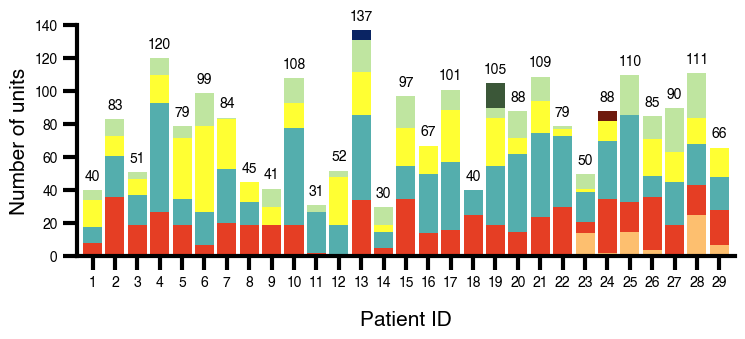

In [28]:
rc('axes', linewidth=axwidth)
rc('xtick.major', width=tickwidth, size=ticksize)
rc('xtick', labelsize=ticklabelsize)        
rc('ytick.major', width=tickwidth, size=ticksize)
rc('ytick', labelsize=ticklabelsize)

fig_wid = 8.5
fig_height = 3.
fig, ax = plt.subplots(1,1, figsize=(fig_wid, fig_height))

bar_width = 0.85

yticks = range(0, 141, 20)
index = np.arange(len(columns))
y_offset = np.zeros(len(columns))

cell_text = []
for i, row in enumerate(range(n_rows)):
    hbar = ax.bar(index, data_list[row], bar_width, align='center', bottom=y_offset,
                   label=rows[i], color=colors[row])

    if i == n_rows - 1:
        ax.bar_label(hbar, padding=5, fontsize=ticksize)
    y_offset = y_offset + data_list[row]

sns.despine()
ymin, ymax = ax.get_ylim()
ax.spines['left'].set_bounds(ymin, ymax+3)
    
ax.set_xticks(range(len(patients)))
ax.set_xticklabels(patients, fontsize=ticksize)

ax.set_yticks(yticks)
ax.set_yticklabels(yticks, fontsize=ticksize)

ax.set_xlabel("Patient ID", fontsize=labelsize, labelpad=15)
ax.set_ylabel("Number of units",fontsize=labelsize)
ax.margins(x=0.01)
#ax.legend(loc='upper right', bbox_to_anchor=(1.18, 1), fontsize=ticksize, frameon=False)

#plt.tight_layout()
plt.savefig(panel_save_dir / "unit_distribution_across_patients.png", bbox_inches="tight", dpi=300)
plt.savefig(panel_save_dir / "unit_distribution_across_patients.svg", bbox_inches="tight", dpi=300)
plt.show()